In [1]:
%matplotlib notebook


In [2]:
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation



In [3]:

"""
===========================
The single spring problem
===========================

This animation illustrates the single spring problem.
"""

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
k = 20.0 # Spring constant


def derivs(state, t):
    # state[0]=x;state[1]=v
    dydx = np.zeros_like(state)
    dydx[0] = state[1]
    dydx[1] = -k/M1*state[0]-M1*G

    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.04
t = np.arange(0.0, 20, dt)

# initial state x0=1, v0=0
x0 = 1.0
v0 = 0.0

# initial state
state = np.array([x0, v0])
#print(state)

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = y[:, 0]
#y1 = -L1*cos(y[:, 0])

v1 = y[:, 1]
#y2 = -L2*cos(y[:, 2]) + y1



In [4]:

"""
===========================
The single spring problem
===========================

This animation illustrates the single spring problem.
"""

G = 10  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
k = 20.0  # Spring constant


def derivs(state, t):
    # state[0]=x;state[1]=v
    dydx = np.zeros_like(state)
    dydx[0] = state[1]
    dydx[1] = -k/M1*state[0]-M1*G

    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.04
t = np.arange(0.0, 20, dt)

# initial state x0=1, v0=0
x0 = 1.0
v0 = 0.0

# initial state
state = np.array([x0, v0])
#print(state)

# integrate your ODE using scipy.integrate.
y2 = integrate.odeint(derivs, state, t)

x2 = y2[:, 0]
#y1 = -L1*cos(y[:, 0])

v2 = y2[:, 1]
#y2 = -L2*cos(y[:, 2]) + y1



<IPython.core.display.Javascript object>


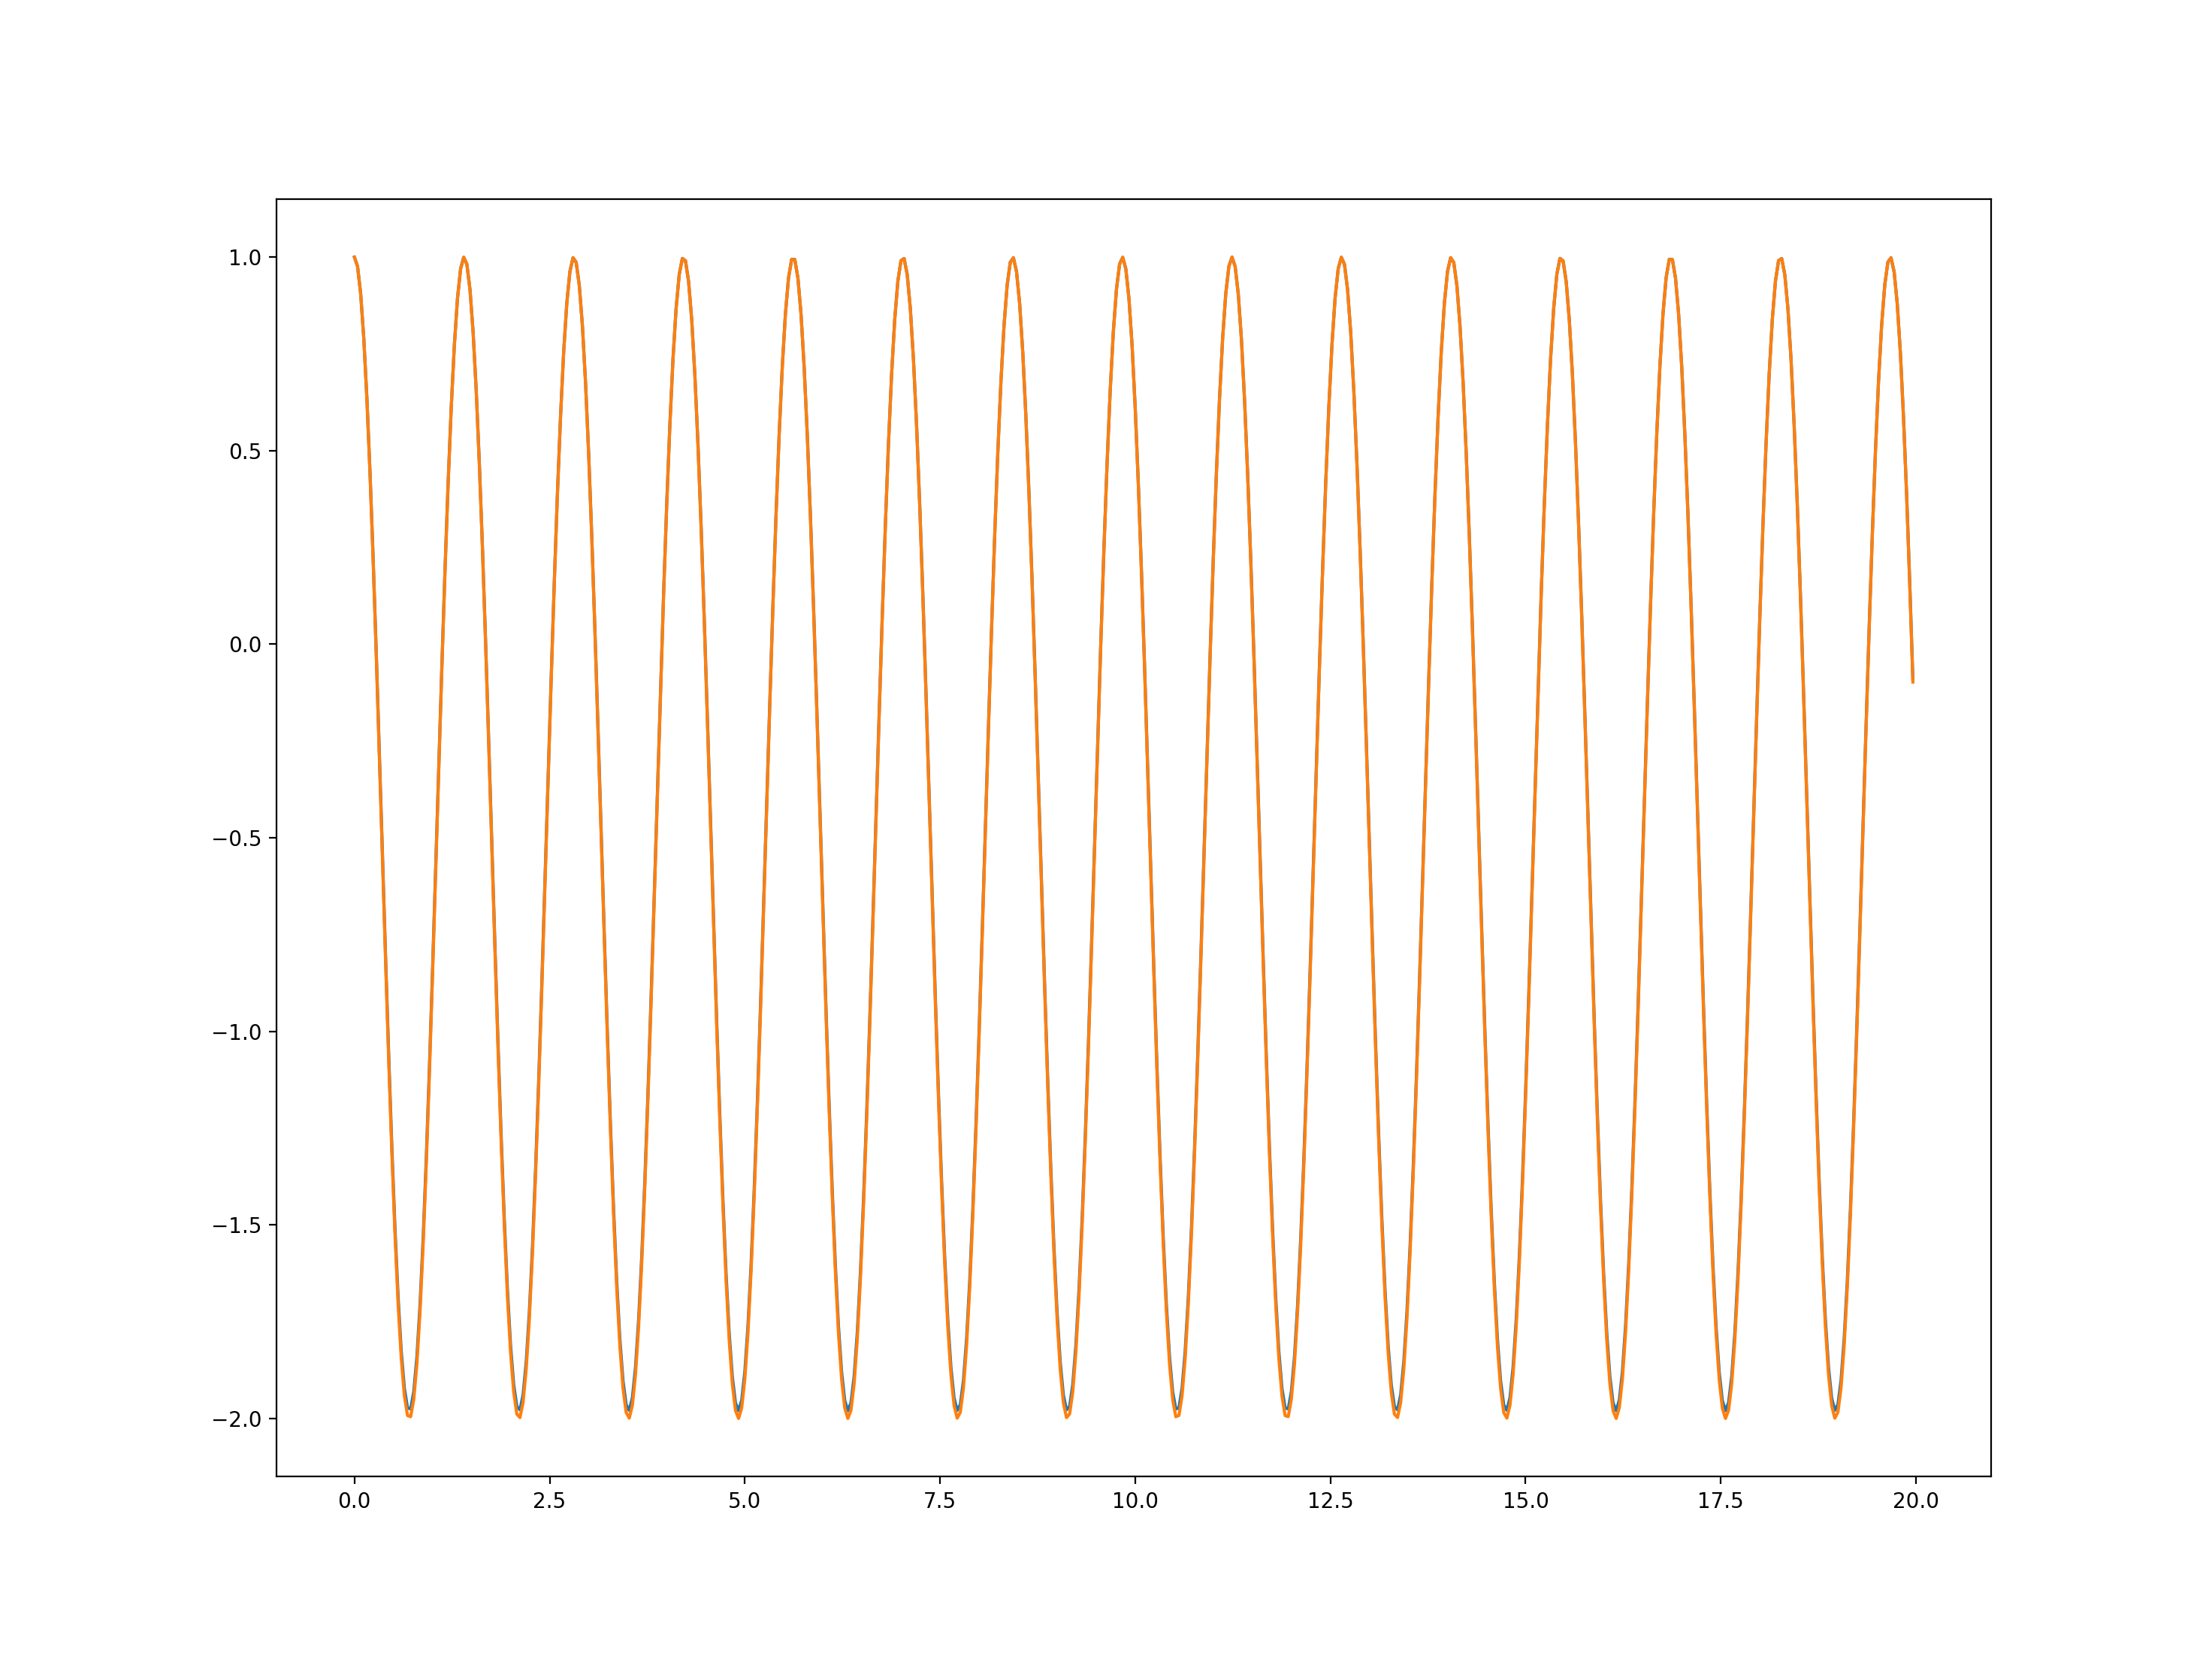

In [5]:
fix, ax = plt.subplots()
ax.plot(t,x1)
ax.plot(t,x2)
plt.show()


<IPython.core.display.Javascript object>


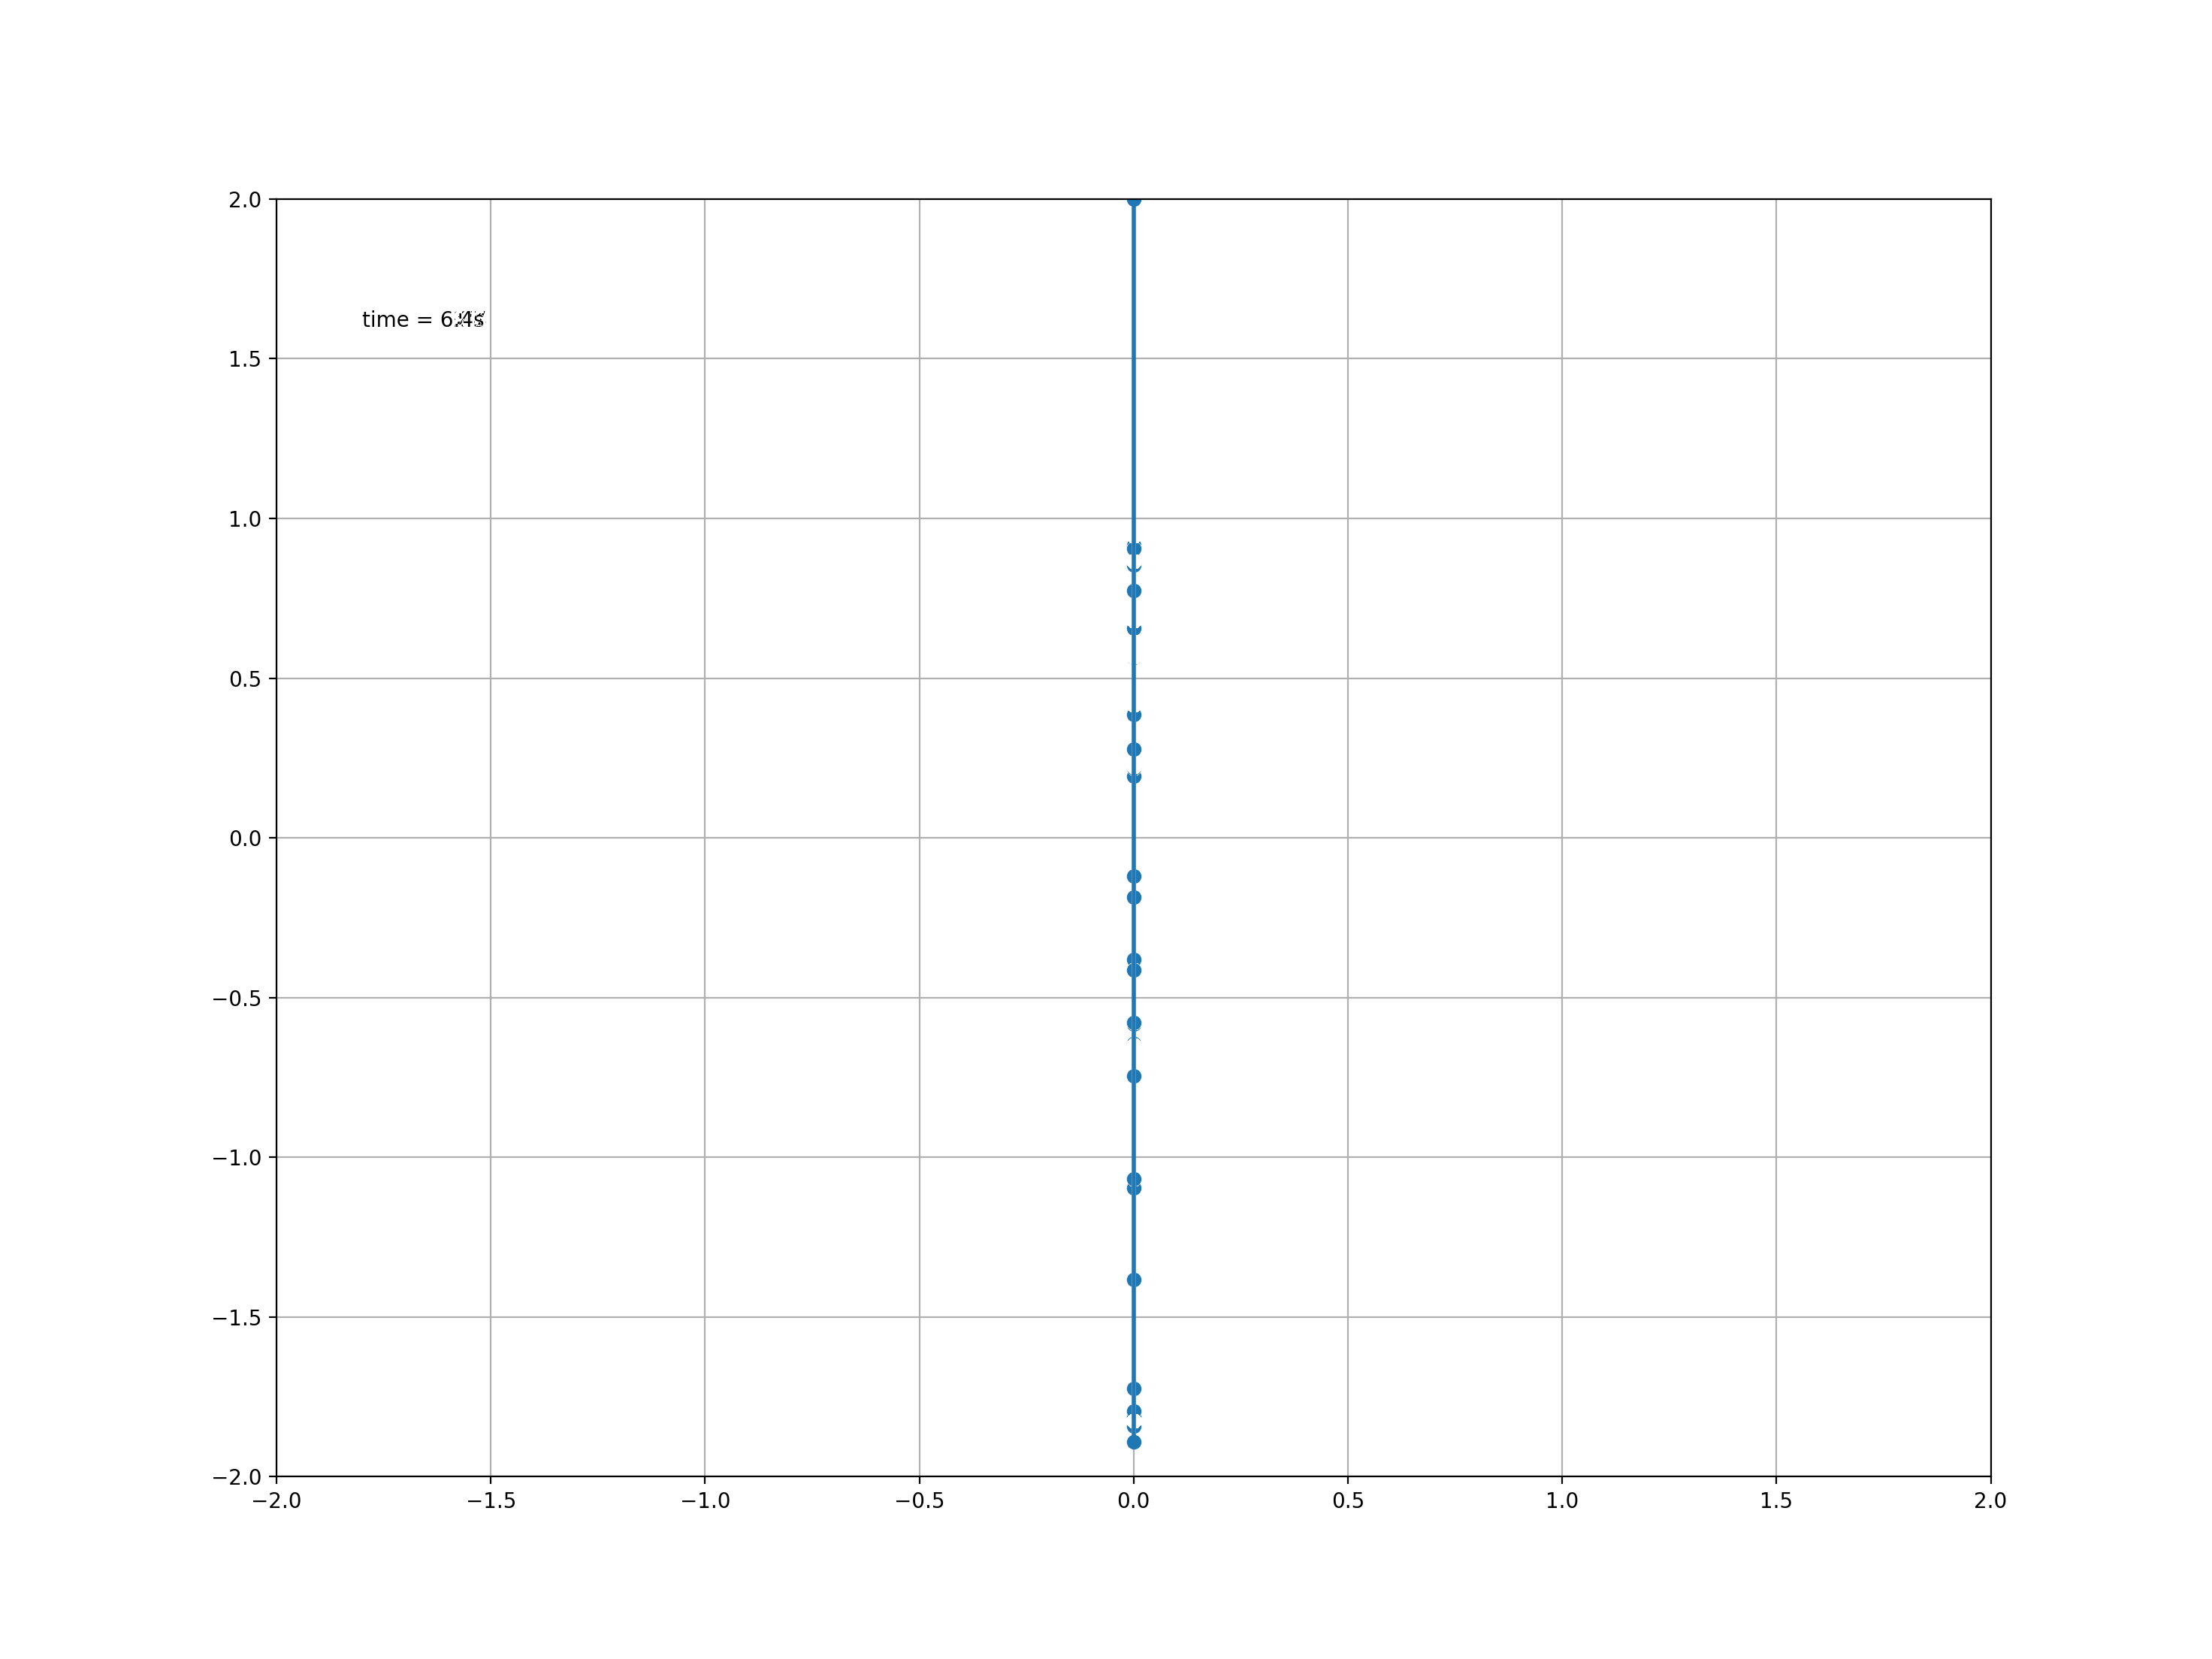

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, 0*x1[i]]
    thisy = [2, x1[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)

#ani.save('single_spring.mp4', fps=25)
plt.show()